<a href="https://colab.research.google.com/github/Not-Pace/Genre-Classifier/blob/main/ErraticCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Genre Classifier using Images**

Based on our experience with transfer learning, we decided to create a model from the ground up. We used keras, split the train and test sets ourselves (a rookie mistake), and found some very interesting problems with the model.

In [ ]:
import librosa
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
import pathlib
import csv

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
train_path = '/content/gdrive/My Drive/Genre-Classifier/Data/train'
test_path = '/content/gdrive/My Drive/Genre-Classifier/Data/test'

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.)

In [ ]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:
datatrain_generator = train_gen.flow_from_directory(train_path, target_size=(300,300), batch_size=42, class_mode = 'categorical')
datatest_generator = test_gen.flow_from_directory(test_path, target_size=(300,300), batch_size=42, class_mode = 'categorical')

Found 818 images belonging to 10 classes.
Found 190 images belonging to 10 classes.


In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    print('\n')
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def build_model():

    # build network topology
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In [ ]:
model = build_model()

Epoch 1/20
20/20 [==============================] - 6s 287ms/step - loss: 3.7587 - accuracy: 0.1773 - val_loss: 2.3246 - val_accuracy: 0.1000
Epoch 2/20
20/20 [==============================] - 5s 274ms/step - loss: 2.0103 - accuracy: 0.2689 - val_loss: 2.6213 - val_accuracy: 0.1000
Epoch 3/20
20/20 [==============================] - 5s 274ms/step - loss: 1.8651 - accuracy: 0.3032 - val_loss: 2.9572 - val_accuracy: 0.1000
Epoch 4/20
20/20 [==============================] - 6s 278ms/step - loss: 1.7750 - accuracy: 0.3399 - val_loss: 3.6475 - val_accuracy: 0.1000
Epoch 5/20
20/20 [==============================] - 5s 274ms/step - loss: 1.6216 - accuracy: 0.4046 - val_loss: 4.6515 - val_accuracy: 0.1000
Epoch 6/20
20/20 [==============================] - 5s 275ms/step - loss: 1.5048 - accuracy: 0.4328 - val_loss: 6.1467 - val_accuracy: 0.1000
Epoch 7/20
20/20 [==============================] - 6s 276ms/step - loss: 1.3996 - accuracy: 0.4804 - val_loss: 6.2567 - val_accuracy: 0.1000
Epoch 

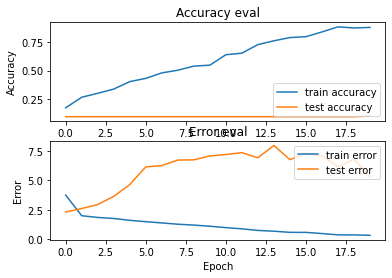

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datatrain_generator, epochs=20, validation_data = datatest_generator, verbose = 1)
model.summary()

plot_history(history)

# **Results**

Pretty much the most important thing to notice here is the fact that the test accuracy is downright 0, and the training accuracy is largely inflated, which means something somewhere just isn't working. The test error was all over the place as well, strengthening my belief that there might be something wrong with the image dataset itself. While Kaggle forums didn't show an issue as such, we decided to take a more rudimentary approach going forward and generated all the images using the audio dataset, and built a model directly on it.